# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

### Let's Import the modules 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


## Task 2 

### Task 2.1: importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [2]:
#corona_dataset_csv = pd.read_csv("data/covid19_Confirmed_dataset.csv")
corona_dataset_csv = pd.read_csv("data/time_series_covid19_confirmed_global.csv")
corona_dataset_csv.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,44443,44503,44706,44988,45280,45490,45716,45839,45966,46215
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,31459,32196,32761,33556,34300,34944,35600,36245,36790,37625
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,72755,73774,74862,75867,77000,78025,79110,80168,81212,82221
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6142,6207,6256,6304,6351,6428,6534,6610,6610,6712
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,14267,14413,14493,14634,14742,14821,14920,15008,15087,15103
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,139,139,139,139,139,140,141,141,141,141
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,1359042,1366182,1370366,1374631,1381795,1390388,1399431,1407277,1413375,1418807
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,123646,124839,126224,126709,127522,129085,130870,132346,133594,134768
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,115,115,115,115,115,115,116,117,117,117
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,4527,4538,4542,4548,4552,4552,4556,4564,4568,4577


#### Let's check the shape of the dataframe

In [3]:
corona_dataset_csv.shape #Shows columns/rows

(271, 317)

### Task 2.2: Delete the useless columns

In [4]:
corona_dataset_csv.drop(["Lat", "Long"], axis=1, inplace=True)

In [5]:
corona_dataset_csv.head(10)

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,44443,44503,44706,44988,45280,45490,45716,45839,45966,46215
1,NaN,Albania,0,0,0,0,0,0,0,0,...,31459,32196,32761,33556,34300,34944,35600,36245,36790,37625
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,72755,73774,74862,75867,77000,78025,79110,80168,81212,82221
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,6142,6207,6256,6304,6351,6428,6534,6610,6610,6712
4,NaN,Angola,0,0,0,0,0,0,0,0,...,14267,14413,14493,14634,14742,14821,14920,15008,15087,15103
5,NaN,Antigua and Barbuda,0,0,0,0,0,0,0,0,...,139,139,139,139,139,140,141,141,141,141
6,NaN,Argentina,0,0,0,0,0,0,0,0,...,1359042,1366182,1370366,1374631,1381795,1390388,1399431,1407277,1413375,1418807
7,NaN,Armenia,0,0,0,0,0,0,0,0,...,123646,124839,126224,126709,127522,129085,130870,132346,133594,134768
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,115,115,115,115,115,115,116,117,117,117
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,4527,4538,4542,4548,4552,4552,4556,4564,4568,4577


### Task 2.3: Aggregating the rows by the country

In [6]:
corona_dataset_aggregated = corona_dataset_csv.groupby("Country/Region").sum() #Groups and sums all the Country/Region repeated results into one

In [8]:
corona_dataset_aggregated.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,44443,44503,44706,44988,45280,45490,45716,45839,45966,46215
Albania,0,0,0,0,0,0,0,0,0,0,...,31459,32196,32761,33556,34300,34944,35600,36245,36790,37625
Algeria,0,0,0,0,0,0,0,0,0,0,...,72755,73774,74862,75867,77000,78025,79110,80168,81212,82221
Andorra,0,0,0,0,0,0,0,0,0,0,...,6142,6207,6256,6304,6351,6428,6534,6610,6610,6712
Angola,0,0,0,0,0,0,0,0,0,0,...,14267,14413,14493,14634,14742,14821,14920,15008,15087,15103
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,139,139,139,139,139,140,141,141,141,141
Argentina,0,0,0,0,0,0,0,0,0,0,...,1359042,1366182,1370366,1374631,1381795,1390388,1399431,1407277,1413375,1418807
Armenia,0,0,0,0,0,0,0,0,0,0,...,123646,124839,126224,126709,127522,129085,130870,132346,133594,134768
Australia,0,0,0,0,4,5,5,6,9,9,...,27806,27821,27834,27843,27853,27865,27873,27886,27892,27902


In [7]:
corona_dataset_aggregated.shape

(191, 313)

### Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

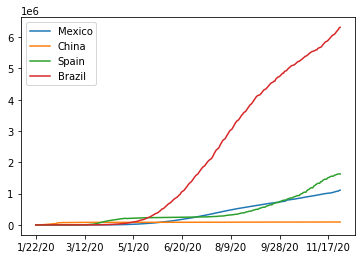

In [9]:
corona_dataset_aggregated.loc["Mexico"].plot()
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
corona_dataset_aggregated.loc["Argentina"].plot()
plt.legend()

### Task3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

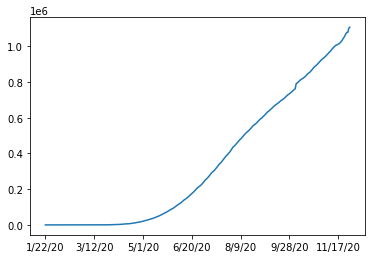

In [10]:
corona_dataset_aggregated.loc['Mexico'].plot()

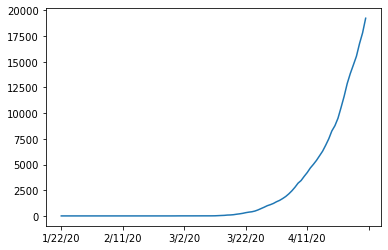

In [12]:
corona_dataset_aggregated.loc["Mexico"][:100].plot() #Plotting the first 3 results

### task 3.1: caculating the first derivative of the curve

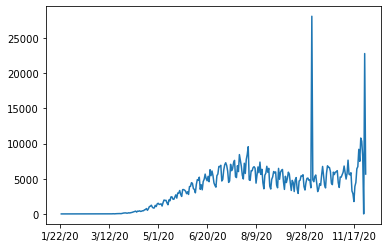

In [15]:
corona_dataset_aggregated.loc["Mexico"].diff().plot() #Change of infections day by day

### task 3.2: find maxmimum infection rate for Mexico

In [18]:
corona_dataset_aggregated.loc["Mexico"].diff().max()

28115.0

In [17]:
corona_dataset_aggregated.loc["Spain"].diff().max()

55019.0

In [16]:
corona_dataset_aggregated.loc["Brazil"].diff().max()

69074.0

### Task 3.3: find maximum infection rate for all of the countries. 

In [19]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []
for c in countries :
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["max_infection_rate"] = max_infection_rates
corona_dataset_aggregated.head(10)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,44503,44706,44988,45280,45490,45716,45839,45966,46215,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,32196,32761,33556,34300,34944,35600,36245,36790,37625,836.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,73774,74862,75867,77000,78025,79110,80168,81212,82221,1133.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,6207,6256,6304,6351,6428,6534,6610,6610,6712,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,14413,14493,14634,14742,14821,14920,15008,15087,15103,355.0
Antigua and Barbuda,0,0,0,0,0,0,0,0,0,0,...,139,139,139,139,140,141,141,141,141,39.0
Argentina,0,0,0,0,0,0,0,0,0,0,...,1366182,1370366,1374631,1381795,1390388,1399431,1407277,1413375,1418807,18326.0
Armenia,0,0,0,0,0,0,0,0,0,0,...,124839,126224,126709,127522,129085,130870,132346,133594,134768,2476.0
Australia,0,0,0,0,4,5,5,6,9,9,...,27821,27834,27843,27853,27865,27873,27886,27892,27902,716.0


### Task 3.4: create a new dataframe with only needed column 

In [20]:
corona_data = pd.DataFrame(corona_dataset_aggregated["max_infection_rate"])

In [23]:
corona_data.head(10)

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,836.0
Algeria,1133.0
Andorra,299.0
Angola,355.0
Antigua and Barbuda,39.0
Argentina,18326.0
Armenia,2476.0
Australia,716.0


### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [24]:
happiness_report_csv = pd.read_csv("data/worldwide_happiness_report.csv")

In [25]:
happiness_report_csv.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


### Task 4.2: let's drop the useless columns 

In [26]:
useless_cols = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [27]:
happiness_report_csv.drop(useless_cols,axis = 1, inplace = True)
happiness_report_csv.head(10)

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557
5,Switzerland,1.452,1.526,1.052,0.572
6,Sweden,1.387,1.487,1.009,0.574
7,New Zealand,1.303,1.557,1.026,0.585
8,Canada,1.365,1.505,1.039,0.584
9,Austria,1.376,1.475,1.016,0.532


### Task 4.3: changing the indices of the dataframe

In [28]:
happiness_report_csv.set_index("Country or region", inplace = True)
happiness_report_csv

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...
Rwanda,0.359,0.711,0.614,0.555
Tanzania,0.476,0.885,0.499,0.417
Afghanistan,0.350,0.517,0.361,0.000


### Task4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [29]:
corona_data.shape

(191, 1)

#### World happiness report Dataset :

In [30]:
happiness_report_csv.shape

(156, 4)

In [31]:
data = corona_data.join(happiness_report_csv, how = "inner") #Joining corona_data + happiness_report_csv intro a single DataFrame
data.head(10)

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,836.0,0.947,0.848,0.874,0.383
Algeria,1133.0,1.002,1.160,0.785,0.086
Argentina,18326.0,1.092,1.432,0.881,0.471
Armenia,2476.0,0.850,1.055,0.815,0.283
Australia,716.0,1.372,1.548,1.036,0.557
Austria,9586.0,1.376,1.475,1.016,0.532
Azerbaijan,4212.0,1.043,1.147,0.769,0.351
Bahrain,841.0,1.362,1.368,0.871,0.536
Bangladesh,4019.0,0.562,0.928,0.723,0.527


### Task 4.5: correlation matrix 

In [32]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.251200,0.181219,0.261015,0.060198
GDP per capita,0.251200,1.000000,0.757521,0.859431,0.394799
Social support,0.181219,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.261015,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.060198,0.394799,0.456317,0.423146,1.000000


### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

In [33]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,836.0,0.947,0.848,0.874,0.383
Algeria,1133.0,1.002,1.160,0.785,0.086
Argentina,18326.0,1.092,1.432,0.881,0.471
Armenia,2476.0,0.850,1.055,0.815,0.283


### Task 5.1: Plotting GDP vs maximum Infection rate

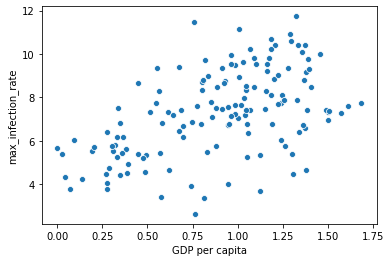

In [34]:
x = data["GDP per capita"]
y = data["max_infection_rate"]
sns.scatterplot(x,np.log(y)) #For the scale, it is a good idea to use Logarithmic Scale for plotting Y

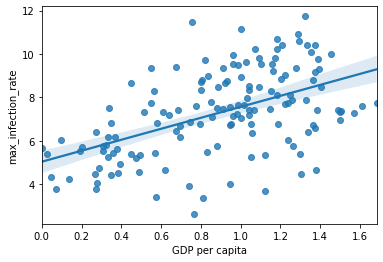

In [35]:
sns.regplot(x,np.log(y))

### Task 5.2: Plotting Social support vs maximum Infection rate

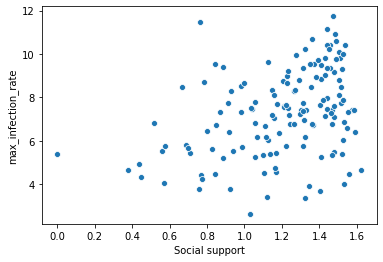

In [36]:
x = data["Social support"]
y = data["max_infection_rate"]
sns.scatterplot(x, np.log(y))

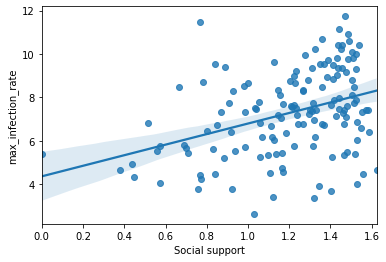

In [37]:
sns.regplot(x,np.log(y))

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

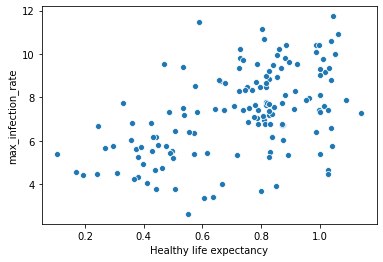

In [38]:
x = data["Healthy life expectancy"]
y = data["max_infection_rate"]
sns.scatterplot(x, np.log(y))

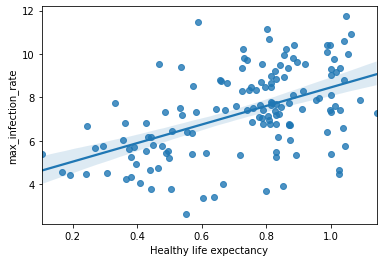

In [39]:
sns.regplot(x,np.log(y))

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

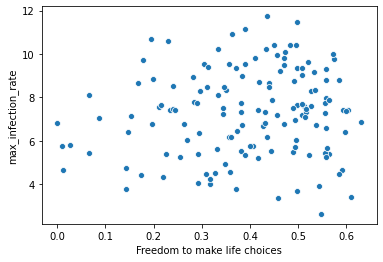

In [40]:
x = data["Freedom to make life choices"]
y = data["max_infection_rate"]
sns.scatterplot(x, np.log(y))

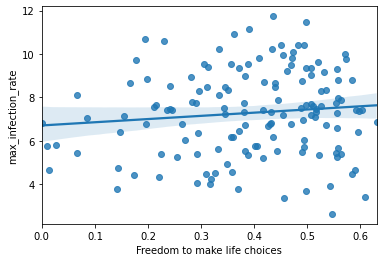

In [41]:
sns.regplot(x,np.log(y))

### Plotting GDP per capita vs Healthy life expectancy

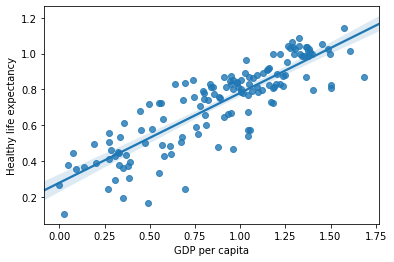

In [47]:
x = data["GDP per capita"]
y = data["Healthy life expectancy"]
sns.regplot(x, y, truncate=False)

### Fuentes:
- COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University [GitHub](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)

